<a href="https://colab.research.google.com/github/Prodholly/perceptron/blob/main/perceptronAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing packages

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

#1.0 Load and Preprocess Data

In [2]:
# load and preprocess

mnist = tf.keras.datasets.mnist

# choose pictures of numbers 2 and 6

(train_images, train_labels), (test_images, test_labels) = mnist.load_data() # include all numbers from 0-9
index_train = np.where((train_labels == 2) | (train_labels == 6)) # index of numbers 2 and 6 in the training data
index_test = np.where((test_labels == 2) | (test_labels == 6)) # index of numbers 2 and 6 in the test data
train_images_26 = train_images[index_train] # select images where the labels are 2 and 6
train_images_26 = train_images_26.reshape((len(train_images_26), train_images_26[1].size))

# lets make the labels of number 2 to be [-1] and labels of number 6 be [+1]
train_labels_26 = train_labels[index_train].astype('int') # get the labels at these index
test_images_26 = test_images[index_test]
test_images_26 = test_images_26.reshape((len(test_images_26), train_images_26[1].size))
test_labels_26 = test_labels[index_test].astype('int')

# change labels from '2' and '6' to '-1' and '+1'

train_labels_26[np.where(train_labels_26 == 2)] = -1
train_labels_26[np.where(train_labels_26 == 6)] = 1
test_labels_26[np.where(test_labels_26 == 2)] = -1
test_labels_26[np.where(test_labels_26 == 6)] = 1

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


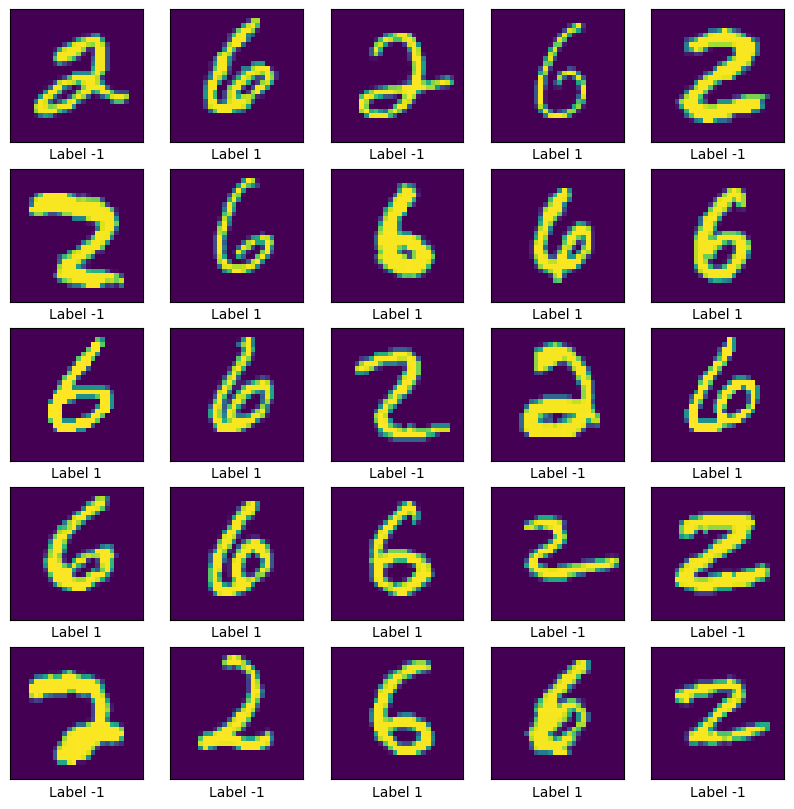

In [3]:
# show the first 25 training data

plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(train_images_26[i].reshape((28, 28)),)
  plt.xlabel('Label ' + str(train_labels_26[i]))

# 2. Data Preprocessing

In [4]:
# first check the the shape

print(f"Training: {train_images_26.shape}, Test: {test_images_26.shape}") # The images have been reshaped to flattended 784-dimensional vectors - a 2D array of (samples, features)

Training: (11876, 784), Test: (1990, 784)


# 2.1 Normalization

We first normalize before adding the bias term

If we add the bias first and then normalize, the bias column will also get normalized along with the pixel features.

This is bad because the bias is meant to be a constant 1, not a normalized value. If it gets scaled, it will no longer act as a proper bias.

In [5]:
train_images_26_w_dummy = train_images_26.astype('float32')/255.0
test_images_26_w_dummy = test_images_26.astype('float32')/255.0

print(f'Normalized pixel values: [{train_images_26_w_dummy.min():.3f}, {train_images_26_w_dummy.max():.3f}]')

Normalized pixel values: [0.000, 1.000]


#2.2 Working with bias

In [6]:
# Add a column of ones at the beginning of each dataset for the bias term
train_images_26_with_bias = np.column_stack((np.ones(len(train_images_26)), train_images_26))
test_images_26_with_bias = np.column_stack((np.ones(len(test_images_26)), test_images_26))

print(f'Original feature dimensions: {train_images_26.shape[1]} (28x28 = 784 pixels)')
print(f'With bias term: {train_images_26_with_bias.shape[1]} features (784 + 1 bias)')
print(f'Training data shape: {train_images_26_with_bias.shape}')
print(f'Test data shape: {test_images_26_with_bias.shape}')

# Verify that the first column is all ones (bias term)
print(f'Bias column verification - all ones: {np.all(train_images_26_with_bias[:, 0] == 1)}')

Original feature dimensions: 784 (28x28 = 784 pixels)
With bias term: 785 features (784 + 1 bias)
Training data shape: (11876, 785)
Test data shape: (1990, 785)
Bias column verification - all ones: True


In [7]:
# select only 1000 samples

train_images_26_with_bias = train_images_26_with_bias[range(1000)]
train_labels_26 = train_labels_26[range(1000)]

print(f'Reduced train samples to: {train_images_26_with_bias.shape}')

print(f'Test samples: {test_images_26_with_bias.shape}')

Reduced train samples to: (1000, 785)
Test samples: (1990, 785)


#3.0 Training The Perceptron Algorithm

In [8]:
# Initialize weight as an all-zero vector (785-dimensional: 784 pixels + 1 bias)
# This will include weights for all pixel features plus the bias term
w = np.zeros(train_images_26_with_bias.shape[1])

# Set the step size
alpha = 0.15

# the prediction function is defined here:
def perceptron_predict(w, X):

    dot_products = X @ w

    # apply sign function: positive -> +1, negative -> -1
    predictions = np.where(dot_products >= 0, 1, -1)

    return predictions

def calculate_accuracy(true_labels, predicted_labels):

    # This counts how many predictions match the true labels
    correct_predictions = np.sum(true_labels == predicted_labels)

    # Calculate accuracy as percentage
    total_samples = len(true_labels)
    accuracy = (correct_predictions / total_samples) * 100.0

    return accuracy

# Test the functions with initial (all-zero) weights
print('\nTesting perceptron functions with initial weights ...')

# Make predictions on training data with initial weights
train_predictions_initial = perceptron_predict(w, train_images_26_with_bias)
train_accuracy_initial = calculate_accuracy(train_labels_26, train_predictions_initial)

# Make predictions on test data with initial weights
test_predictions_initial = perceptron_predict(w, test_images_26_with_bias)
test_accuracy_initial = calculate_accuracy(test_labels_26, test_predictions_initial)

print(f'Initial training accuracy (with zero weights): {train_accuracy_initial:.2f}%')
print(f'Initial test accuracy (with zero weights): {test_accuracy_initial:.2f}%')
print(f'Sample predictions: {train_predictions_initial[:10]} (first 10 training samples)')
print(f'Actual labels: {train_labels_26[:10]} (first 10 training samples)')


Testing perceptron functions with initial weights ...
Initial training accuracy (with zero weights): 50.90%
Initial test accuracy (with zero weights): 48.14%
Sample predictions: [1 1 1 1 1 1 1 1 1 1] (first 10 training samples)
Actual labels: [-1  1 -1  1 -1 -1  1  1  1  1] (first 10 training samples)


#3.1 Implementing the Perceptron Training Algorithm

In [9]:


def train_perceptron(X_train, y_train, alpha, target_accuracy, max_epochs=50):

    # Initialize weight vector
    w = np.zeros(X_train.shape[1])

    # Lists to track training progress
    accuracy_history = []
    epoch_count = 0

    print(f'Starting training with target accuracy: {target_accuracy}%')
    print('Epoch | Accuracy | Misclassified | Weight Updates')
    print('-' * 50)

    # Main training loop
    for epoch in range(max_epochs):
        epoch_count += 1
        weight_updates = 0

        # Iterate through all training samples
        for i in range(len(X_train)):
            # Get current sample and label
            x_i = X_train[i]  # Feature vector for sample i
            y_i = y_train[i]  # True label for sample i

            # Make prediction for current sample
            prediction = perceptron_predict(w, x_i.reshape(1, -1))[0]

            # Check if sample is misclassified
            if prediction != y_i:
                # Update weights
                w = w + alpha * y_i * x_i
                weight_updates += 1

        # Calculate accuracy after this epoch
        train_predictions = perceptron_predict(w, X_train)
        current_accuracy = calculate_accuracy(y_train, train_predictions)
        accuracy_history.append(current_accuracy)

        # Print progress every 10 epochs or if accuracy is high
        if epoch % 10 == 0 or current_accuracy >= target_accuracy:
            misclassified = len(y_train) - int(current_accuracy * len(y_train) / 100)
            print(f'{epoch+1:5d} | {current_accuracy:7.2f}% | {misclassified:12d} | {weight_updates:13d}')

        # Check stopping criterion
        if current_accuracy >= target_accuracy:
            print(f'\nTarget accuracy {target_accuracy}% reached!')
            print(f'Training completed in {epoch_count} epochs')
            break
    else:
        print(f'\nWarning: Maximum epochs ({max_epochs}) reached without convergence')
        print(f'Final accuracy: {accuracy_history[-1]:.2f}%')

    return w, epoch_count, accuracy_history

print('\n' + '='*60)
print('PERCEPTRON TRAINING EXPERIMENTS')
print('='*60)

# Experiment (a): Train until 95% accuracy
print('\nEXPERIMENT (a): Training with 95% stopping criterion')
print('-'*50)
w_95, epochs_95, accuracy_history_95 = train_perceptron(
    train_images_26_with_bias,
    train_labels_26,
    alpha,
    target_accuracy=95.0
)

# Experiment (b): Train until 80% accuracy
print('\nEXPERIMENT (b): Training with 80% stopping criterion')
print('-'*50)
w_80, epochs_80, accuracy_history_80 = train_perceptron(
    train_images_26_with_bias,
    train_labels_26,
    alpha,
    target_accuracy=80.0
)

# Summary of training results
print('\n' + '='*60)
print('TRAINING SUMMARY')
print('='*60)
print(f'95% criterion: {epochs_95} epochs, final accuracy: {accuracy_history_95[-1]:.2f}%')
print(f'80% criterion: {epochs_80} epochs, final accuracy: {accuracy_history_80[-1]:.2f}%')


PERCEPTRON TRAINING EXPERIMENTS

EXPERIMENT (a): Training with 95% stopping criterion
--------------------------------------------------
Starting training with target accuracy: 95.0%
Epoch | Accuracy | Misclassified | Weight Updates
--------------------------------------------------
    1 |   97.80% |           22 |            66

Target accuracy 95.0% reached!
Training completed in 1 epochs

EXPERIMENT (b): Training with 80% stopping criterion
--------------------------------------------------
Starting training with target accuracy: 80.0%
Epoch | Accuracy | Misclassified | Weight Updates
--------------------------------------------------
    1 |   97.80% |           22 |            66

Target accuracy 80.0% reached!
Training completed in 1 epochs

TRAINING SUMMARY
95% criterion: 1 epochs, final accuracy: 97.80%
80% criterion: 1 epochs, final accuracy: 97.80%


#4.0 Calculate 0-1 Loss

In [10]:


def calculate_01_loss(true_labels, predicted_labels):

    # Count misclassified samples (where prediction != true label)
    misclassified_count = np.sum(true_labels != predicted_labels)

    # Calculate 0-1 loss as fraction of misclassified samples
    total_samples = len(true_labels)
    loss_01 = misclassified_count / total_samples

    return loss_01

def evaluate_model_performance(w, X_train, y_train, X_test, y_test, model_name="Perceptron"):

    # Make predictions on training data
    train_predictions = perceptron_predict(w, X_train)
    train_loss_01 = calculate_01_loss(y_train, train_predictions)
    train_accuracy = calculate_accuracy(y_train, train_predictions)

    # Make predictions on test data
    test_predictions = perceptron_predict(w, X_test)
    test_loss_01 = calculate_01_loss(y_test, test_predictions)
    test_accuracy = calculate_accuracy(y_test, test_predictions)

    # Display results
    print(f'\n{model_name} Performance Evaluation:')
    print('-' * 40)
    print(f'Training Set:')
    print(f'  - 0-1 Loss: {train_loss_01:.4f} ({train_loss_01*100:.2f}%)')
    print(f'  - Accuracy: {train_accuracy:.2f}%')
    print(f'Test Set:')
    print(f'  - 0-1 Loss: {test_loss_01:.4f} ({test_loss_01*100:.2f}%)')
    print(f'  - Accuracy: {test_accuracy:.2f}%')

    return train_loss_01, test_loss_01

# Test the 0-1 loss function with some example predictions
print('\nTesting 0-1 loss calculation...')
print('='*50)

# Example: perfect predictions (loss should be 0.0)
example_true = np.array([1, -1, 1, -1, 1])
example_pred_perfect = np.array([1, -1, 1, -1, 1])
perfect_loss = calculate_01_loss(example_true, example_pred_perfect)
print(f'Perfect predictions: 0-1 loss = {perfect_loss:.4f}')

# Example: all wrong predictions (loss should be 1.0)
example_pred_wrong = np.array([-1, 1, -1, 1, -1])
wrong_loss = calculate_01_loss(example_true, example_pred_wrong)
print(f'All wrong predictions: 0-1 loss = {wrong_loss:.4f}')

# Example: 60% correct predictions (loss should be 0.4)
example_pred_partial = np.array([1, -1, 1, 1, -1])  # 3 correct out of 5
partial_loss = calculate_01_loss(example_true, example_pred_partial)
print(f'60% correct predictions: 0-1 loss = {partial_loss:.4f}')

# Now evaluate both trained models using 0-1 loss
print('\n' + '='*60)
print('FINAL MODEL EVALUATION USING 0-1 LOSS')
print('='*60)

# Evaluate model trained with 95% stopping criterion
train_loss_95, test_loss_95 = evaluate_model_performance(
    w_95,
    train_images_26_with_bias,
    train_labels_26,
    test_images_26_with_bias,
    test_labels_26,
    "Perceptron (95% stopping)"
)

# Evaluate model trained with 80% stopping criterion
train_loss_80, test_loss_80 = evaluate_model_performance(
    w_80,
    train_images_26_with_bias,
    train_labels_26,
    test_images_26_with_bias,
    test_labels_26,
    "Perceptron (80% stopping)"
)

# Summary comparison
print('\n' + '='*60)
print('COMPARISON SUMMARY')
print('='*60)
print('Model                | Train 0-1 Loss | Test 0-1 Loss | Epochs')
print('-'*60)
print(f'95% stopping         | {train_loss_95:11.4f} | {test_loss_95:10.4f} | {epochs_95:6d}')
print(f'80% stopping         | {train_loss_80:11.4f} | {test_loss_80:10.4f} | {epochs_80:6d}')


Testing 0-1 loss calculation...
Perfect predictions: 0-1 loss = 0.0000
All wrong predictions: 0-1 loss = 1.0000
60% correct predictions: 0-1 loss = 0.4000

FINAL MODEL EVALUATION USING 0-1 LOSS

Perceptron (95% stopping) Performance Evaluation:
----------------------------------------
Training Set:
  - 0-1 Loss: 0.0220 (2.20%)
  - Accuracy: 97.80%
Test Set:
  - 0-1 Loss: 0.0281 (2.81%)
  - Accuracy: 97.19%

Perceptron (80% stopping) Performance Evaluation:
----------------------------------------
Training Set:
  - 0-1 Loss: 0.0220 (2.20%)
  - Accuracy: 97.80%
Test Set:
  - 0-1 Loss: 0.0281 (2.81%)
  - Accuracy: 97.19%

COMPARISON SUMMARY
Model                | Train 0-1 Loss | Test 0-1 Loss | Epochs
------------------------------------------------------------
95% stopping         |      0.0220 |     0.0281 |      1
80% stopping         |      0.0220 |     0.0281 |      1
